In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
survey_data = pd.read_excel('survey_data.xlsx')
survey_data.head()

,round,average_clustered_words_humans,min_clustered_humans,max_clustered_humans,clustered_words_agents,semantic_aggreance,most_frequent_word,word_spymaster,category_overlap,word_frequency_mf,consensus_score,average_guesses_humans,guesses_agents,right_guesses_humans,opponent_guesses_humans,neutral_guesses_humans,assassin_guesses_humans,right_guesses_agents,opponent_guesses_agents,neutral_guesses_agents
0,1,2.714286,2,4,2,0.375,resources,Metal,0.375,0.250,0.3625,1.56,2,0.64,0.21,0.14,0.0,0.50,0.0,0.50
1,2,3.142857,2,4,3,0.625,building,Building,0.625,0.375,0.6000,2.67,2,0.96,0.00,0.04,0.0,1.00,0.0,0.00
2,3,2.714286,2,3,2,0.000,animal,White,0.500,0.375,0.4875,1.78,2,0.69,0.00,0.31,0.0,1.00,0.0,0.00
3,4,1.714286,1,3,3,0.000,sauce,Cover,0.500,0.250,0.4750,1.78,3,0.44,0.25,0.31,0.0,0.67,0.0,0.33
4,5,2.285714,2,3,2,0.250,young sheldon,Insect,0.250,0.250,0.2500,1.56,2,1.00,0.00,0.00,0.0,1.00,0.0,0.00


## Analysis of Field Agent Survey

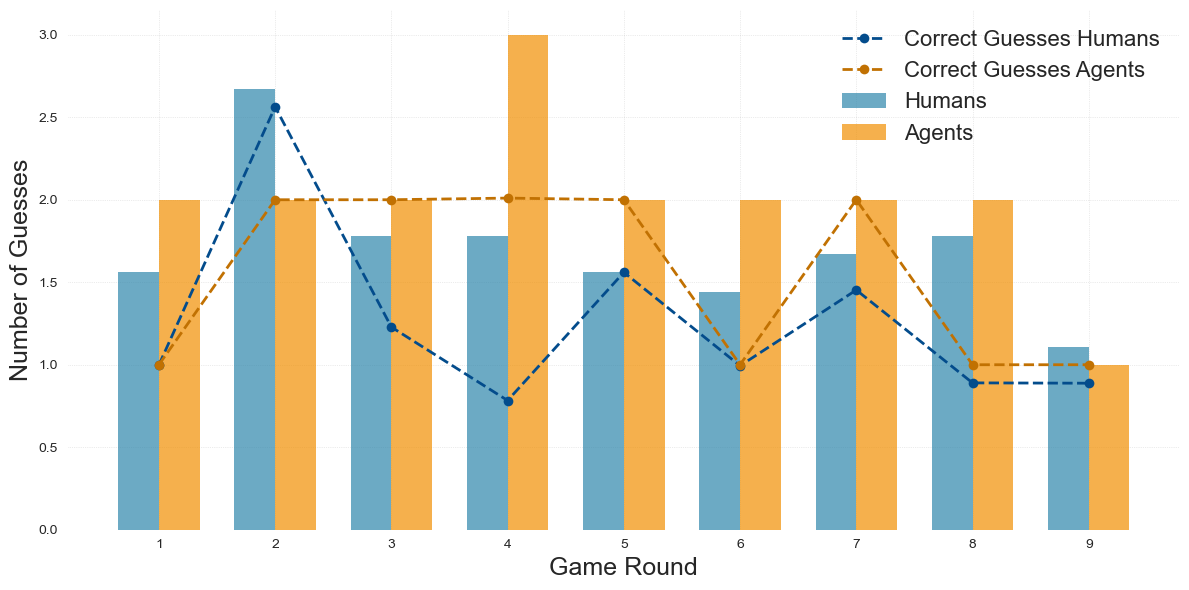

In [3]:
# histogram showing right guesses humans vs. right guesses agents w/ overall guesses
survey_data['total_right_guesses_humans']= survey_data['right_guesses_humans'] * survey_data['average_guesses_humans']
survey_data['total_right_guesses_agents']=survey_data['right_guesses_agents'] * survey_data['guesses_agents']

human_color = '#2E86AB'  # Steel blue
agent_color = '#F18F01'  # Orange
human_line = '#034C8C'   # Darker blue
agent_line = '#C17102'   # Darker orange
plt.figure(figsize=(12,6),facecolor='white')
plt.style.use('seaborn')
# bars
ax = plt.gca()
ax.set_facecolor('white')
bar_width = 0.35
x = range(len(survey_data))

plt.bar([i - bar_width/2 for i in x], survey_data['average_guesses_humans'], bar_width,
        label='Humans',color=human_color, alpha=0.7)
plt.bar([i + bar_width/2 for i in x], survey_data['guesses_agents'], bar_width,
        label='Agents', color=agent_color, alpha=0.7)

# Line for right guesses
plt.plot(x, survey_data['total_right_guesses_humans'], marker='o', color=human_line,
         label='Correct Guesses Humans', linestyle='--', linewidth=2)
plt.plot(x, survey_data['total_right_guesses_agents'], marker='o', color=agent_line,
         label='Correct Guesses Agents', linestyle='--', linewidth=2)
plt.xlabel('Game Round', fontsize=18)
plt.ylabel('Number of Guesses', fontsize = 18)
#plt.title('Comparison of Right Guesses by Humans and Agents per Game Round', fontsize=12, pad=15)
plt.xticks(x, survey_data['round'])
plt.legend(fontsize = 16)

plt.grid(axis='y', color='gray', linestyle=':', linewidth=0.5, alpha=0.3)
plt.grid(axis='x', color='gray', linestyle=':', linewidth=0.5, alpha=0.3)

plt.tight_layout()

# Show the plot
plt.show()

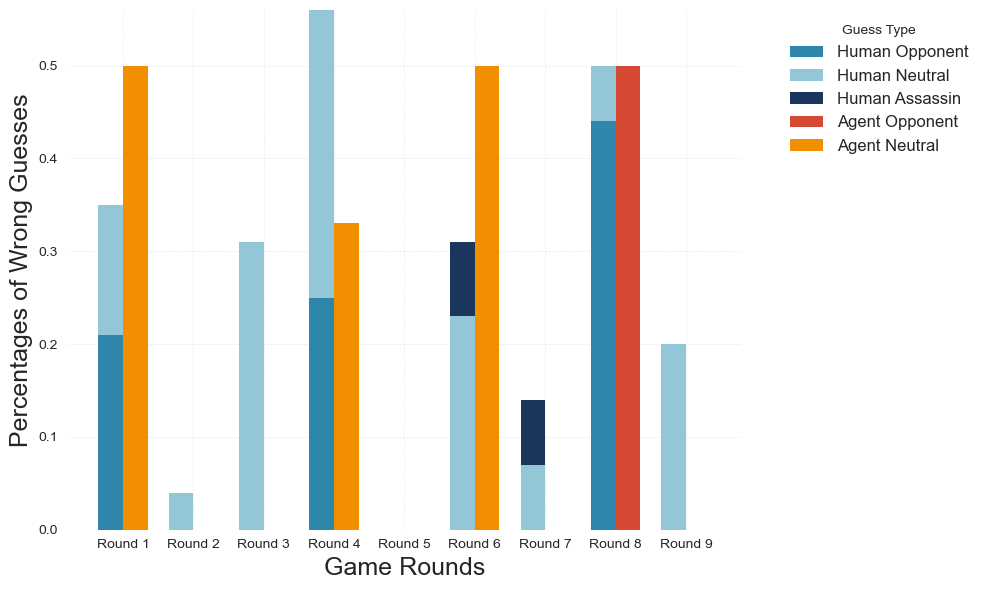

In [42]:
# histogram for composition wrong guesses
rounds = survey_data['round']
human_opponent = survey_data['opponent_guesses_humans']
human_neutral = survey_data['neutral_guesses_humans']
human_assassin = survey_data['assassin_guesses_humans']
agent_opponent = survey_data['opponent_guesses_agents']
agent_neutral = survey_data['neutral_guesses_agents']
colors = {
    'human_opponent': '#2E86AB',  
    'human_neutral': '#93C6D6',   
    'human_assassin': '#1B365C',  
    'agent_neutral': '#F18F01',  
    'agent_opponent': '#D64933'    
}

bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')
plt.style.use('seaborn')

# human
ax.bar(rounds - bar_width / 2, human_opponent, width=bar_width, label='Human Opponent', color = colors['human_opponent'])
ax.bar(rounds - bar_width / 2, human_neutral, width=bar_width, bottom=human_opponent, label='Human Neutral', color=colors['human_neutral'])
ax.bar(rounds - bar_width / 2, human_assassin, width=bar_width,
       bottom=human_opponent + human_neutral, label='Human Assassin', color=colors['human_assassin'])

# agent 
ax.bar(rounds + bar_width / 2, agent_opponent, width=bar_width, label='Agent Opponent', color=colors['agent_opponent'])
ax.bar(rounds + bar_width / 2, agent_neutral, width=bar_width,
       bottom=agent_opponent, label='Agent Neutral', color=colors['agent_neutral'])

ax.set_xlabel('Game Rounds', fontsize = 18)
ax.set_ylabel('Percentages of Wrong Guesses', fontsize=18)
#ax.set_title('Composition of Wrong Guesses per Player (Agent vs Human)')
ax.set_xticks(rounds)
ax.set_xticklabels([f'Round {r}' for r in rounds])
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Guess Type", fontsize = 12)

plt.grid(axis='y', color='gray', linestyle=':', linewidth=0.5, alpha=0.3)
plt.grid(axis='x', color='gray', linestyle=':', linewidth=0.5, alpha=0.3)

plt.tight_layout()

plt.show()

## Spymaster Survey Evaluation


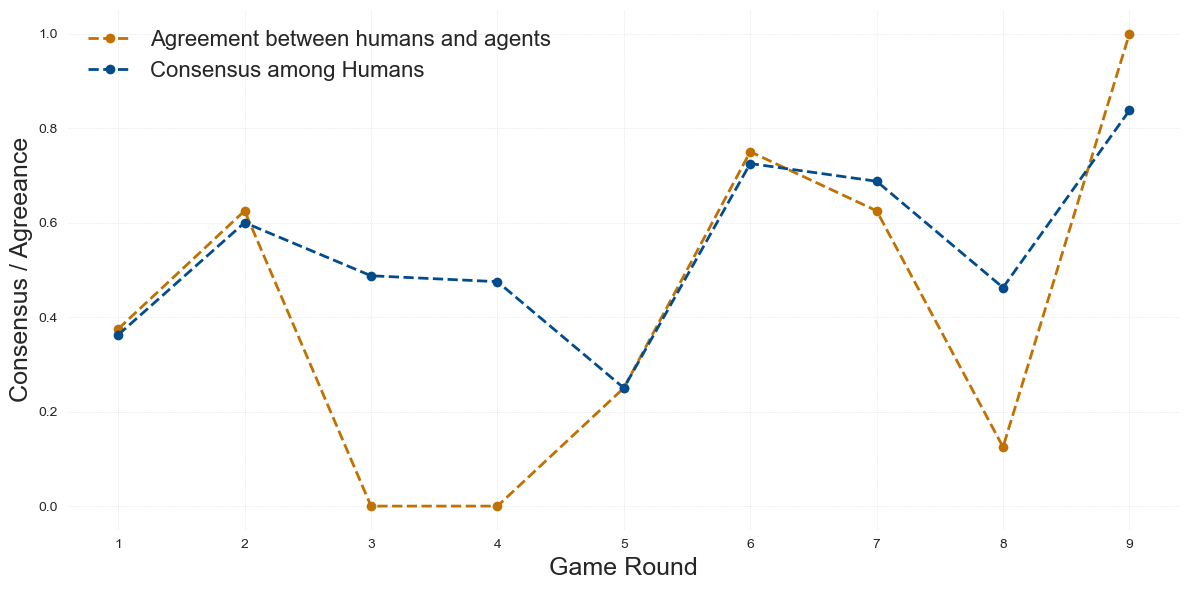

In [46]:
# plot consenesus and agreement
human_line = '#034C8C'   
agent_line = '#C17102' 

rounds = survey_data['round']
agreement = survey_data['semantic_aggreance']
consensus = survey_data['consensus_score']

plt.figure(figsize=(12,6),facecolor='white')
plt.style.use('seaborn')
ax = plt.gca()
ax.set_facecolor('white')
x = range(len(survey_data))

plt.plot(x, agreement, marker='o', color=agent_line,
         label='Agreement between humans and agents', linestyle='--', linewidth=2)
plt.plot(x, consensus, marker='o', color=human_line,
         label='Consensus among Humans', linestyle='--', linewidth=2)
plt.xlabel('Game Round', fontsize=18)
plt.ylabel('Consensus / Agreeance', fontsize = 18)
plt.xticks(x, rounds)

plt.grid(axis='y', color='gray', linestyle=':', linewidth=0.5, alpha=0.3)
plt.grid(axis='x', color='gray', linestyle=':', linewidth=0.5, alpha=0.3)

plt.legend(fontsize = 16)

plt.tight_layout()
plt.show()


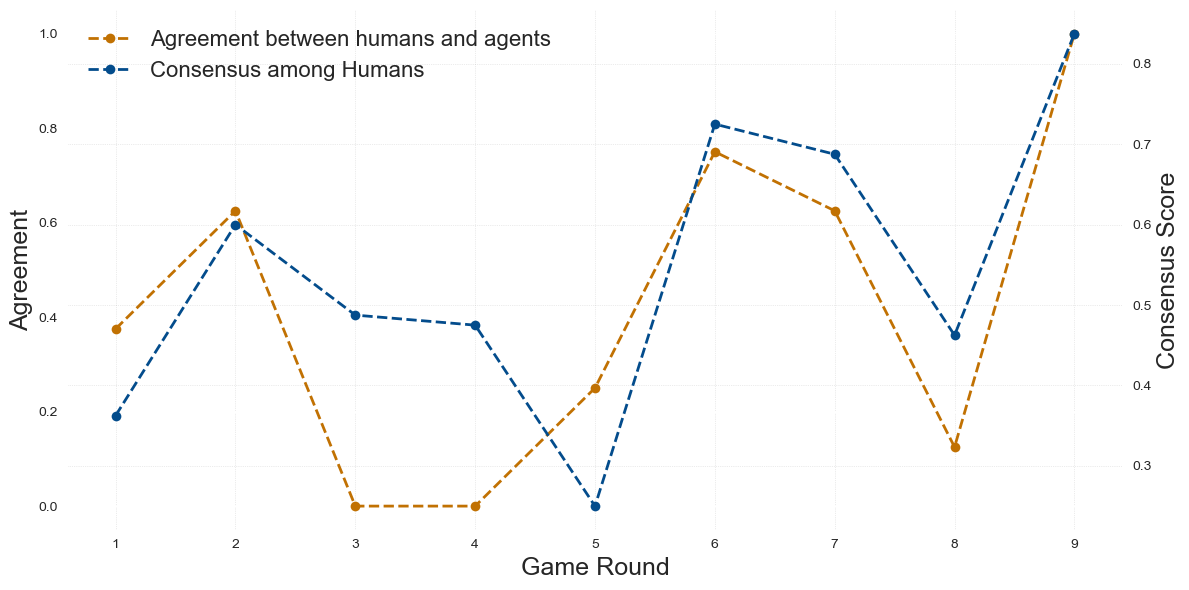

In [5]:
# plot consenesus and agreement
human_line = '#034C8C'   
agent_line = '#C17102' 

rounds = survey_data['round']
agreement = survey_data['semantic_aggreance']
consensus = survey_data['consensus_score']

plt.figure(figsize=(12, 6), facecolor='white')
plt.style.use('seaborn')
ax1 = plt.gca()
ax1.set_facecolor('white')
x = range(len(rounds))

# Plot agreement on the first y-axis
line1 = ax1.plot(x, agreement, marker='o', color=agent_line,
                 label='Agreement between humans and agents', linestyle='--', linewidth=2)
ax1.set_xlabel('Game Round', fontsize=18)
ax1.set_ylabel('Agreement', fontsize=18)
ax1.set_xticks(x)
ax1.set_xticklabels(rounds)

# Create second y-axis and plot consensus
ax2 = ax1.twinx()
line2 = ax2.plot(x, consensus, marker='o', color=human_line,
                 label='Consensus among Humans', linestyle='--', linewidth=2)
ax2.set_ylabel('Consensus Score', fontsize=18)

# Add grid
plt.grid(axis='y', color='gray', linestyle=':', linewidth=0.5, alpha=0.3)
ax1.grid(axis='x', color='gray', linestyle=':', linewidth=0.5, alpha=0.3)

# Combine legends from both axes
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize=16)

plt.tight_layout()
plt.show()

### overall agreement of humans and agents however (with most frquent clues for humans)
- create table
- proposed words humans
- proposed words agents